In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.model_selection import cross_val_score,GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### **Making Layers for the Neural Network(The Model Architecture)**

In [2]:
classifier=Sequential()

classifier.add(Conv2D(filters = 16, kernel_size=3, padding='same', input_shape = (64, 64, 3), activation = 'relu'))#Making the first layer for input matrix
classifier.add(MaxPooling2D(pool_size = (2, 2)))#Reducing size of input data
classifier.add(Conv2D(filters = 32, kernel_size=3, padding='same', activation = 'relu'))#Making further layers 
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(filters = 32, kernel_size=3, padding='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())#Changing dimensionality of multi-dimensional data so that it is appropriate for a 1-D Neural network layer

classifier.add(Dense(output_dim = 1024, init='uniform', activation = 'relu'))
classifier.add(Dropout(0.2))#Deliberatly leaving some nodes disconnected to avoid overfitting
classifier.add(Dense(output_dim = 1, init='uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])#compiling the whole network

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


**Loading Data and Processing Images:**

Since Images cannot be used directly as input we need to makes them in form of vectors (matrices) which are acceptable by the computer for processing.


In [3]:
#Making training, and validation datasets 
#Processing images and creating matrices for each image according to the features indentified by the computer

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#The model was trained on google collab so the path of the file is different from what it should be according to the current folder arrangment
#According to the current folder arrangment please use this path for training_set :'dataset/training_set' and this for test_set :'dataset/test_set'

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/dataset/training_set', target_size=(64, 64), batch_size=16, class_mode='binary')
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/dataset/test_set', target_size=(64, 64), batch_size=16, class_mode='binary')

Found 8010 images belonging to 2 classes.
Found 2004 images belonging to 2 classes.


 **Training the Model:**

In [5]:
classifier.fit_generator(training_set,steps_per_epoch = 8000/4 ,epochs = 15,validation_data = test_set,validation_steps = 2000/4)

Epoch 1/15
2000/2000 [==============================] - 2739s 1s/step - loss: 0.5545 - accuracy: 0.7115 - val_loss: 0.4607 - val_accuracy: 0.7730
Epoch 2/15
2000/2000 [==============================] - 332s 166ms/step - loss: 0.4464 - accuracy: 0.7879 - val_loss: 0.2230 - val_accuracy: 0.8062
Epoch 3/15
2000/2000 [==============================] - 335s 167ms/step - loss: 0.3903 - accuracy: 0.8217 - val_loss: 0.6183 - val_accuracy: 0.8090
Epoch 4/15
2000/2000 [==============================] - 339s 169ms/step - loss: 0.3371 - accuracy: 0.8509 - val_loss: 0.3489 - val_accuracy: 0.8346
Epoch 5/15
2000/2000 [==============================] - 341s 170ms/step - loss: 0.2863 - accuracy: 0.8763 - val_loss: 0.4030 - val_accuracy: 0.8267
Epoch 6/15
2000/2000 [==============================] - 341s 171ms/step - loss: 0.2323 - accuracy: 0.9036 - val_loss: 0.3663 - val_accuracy: 0.8228
Epoch 7/15
2000/2000 [==============================] - 335s 168ms/step - loss: 0.1911 - accuracy: 0.9223 - val_lo

After the model is trained the obtained Neural Network can be used to classify images into two categories namely dogs and cats. One example is shown below:

cat


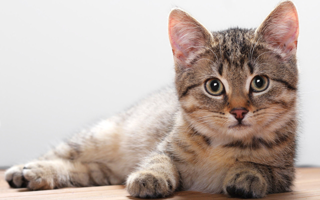

In [26]:
#We can use different images os cats and dogs if it is a cat or a dog
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

img=Image.open('/content/drive/My Drive/Colab Notebooks/dataset/single_prediction/cat_or_dog_2.jpg')
img.thumbnail((360, 200))
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/dataset/single_prediction/cat_or_dog_2.jpg',target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image= np.expand_dims(test_image, axis=0)
result=classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction ='cat'
print(prediction)
img

In [27]:
test_image.shape
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [28]:
#Loss and Accuracy of the Model trained are:
print(classifier.metrics_names)
classifier.evaluate(test_set, verbose= False )


['loss', 'accuracy']


[0.0482732392847538, 0.8308383226394653]